# Evaluation Project - 8
Flight Price Prediction
Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records
FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_excel(r"Data_Train.xlsx")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_train.shape

(10683, 11)

In [4]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
4h 10m       1
31h 50m      1
42h 45m      1
31h 30m      1
27h 55m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
df_train.dropna(inplace = True)

In [8]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Data Visualization

<AxesSubplot:>

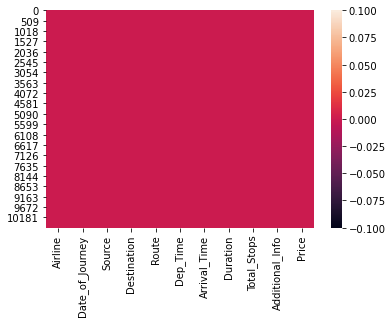

In [9]:
sns.heatmap(df_train.isnull())

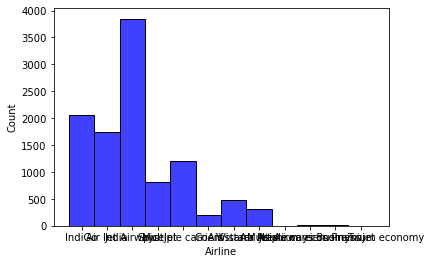

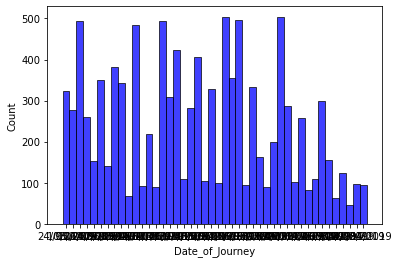

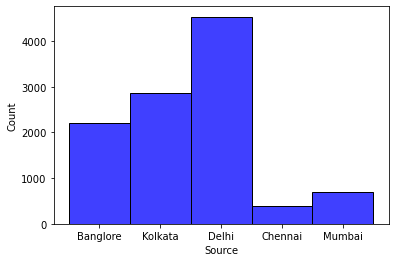

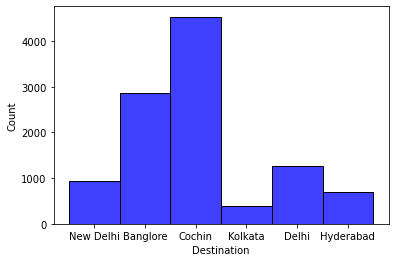

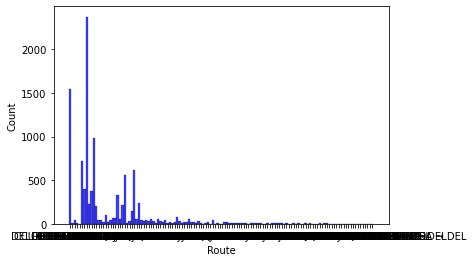

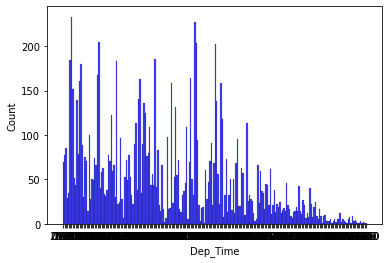

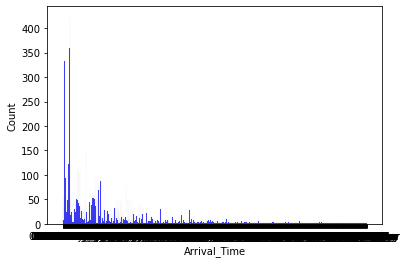

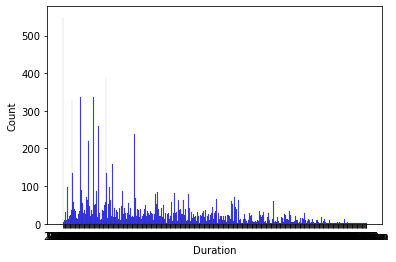

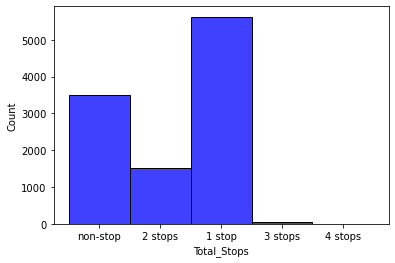

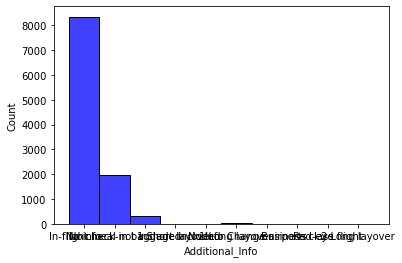

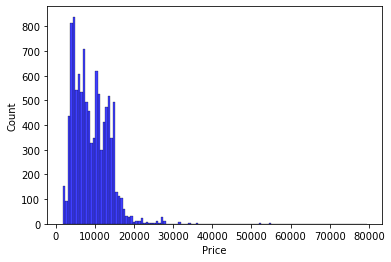

In [10]:
for i in df_train.columns:
    plt.figure()
    sns.histplot(df_train[i],color='blue')

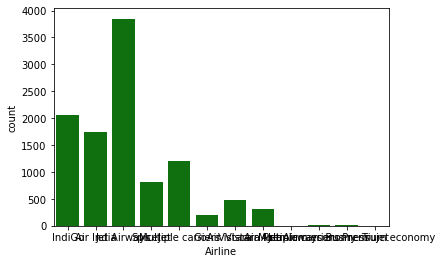

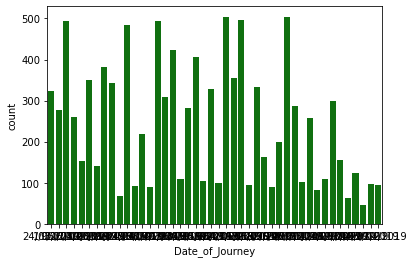

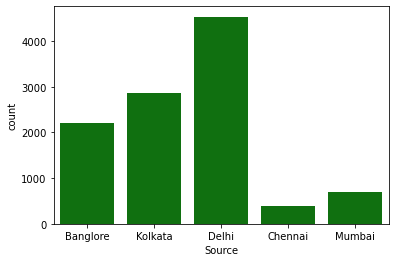

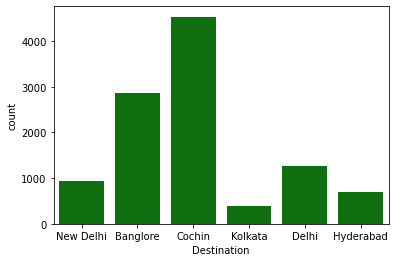

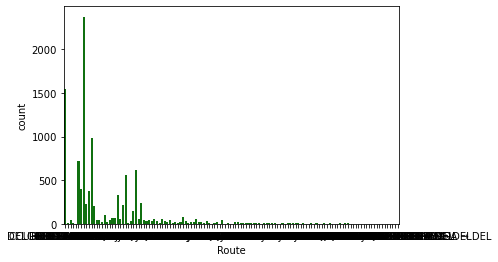

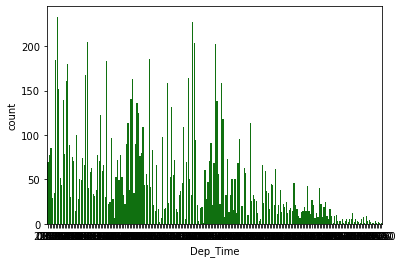

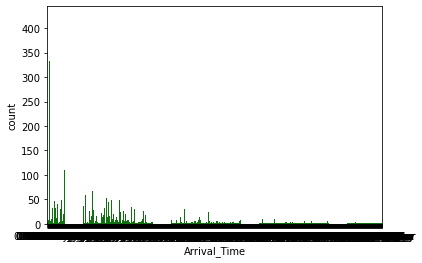

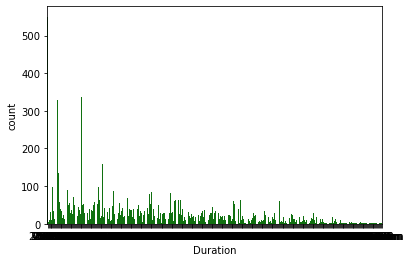

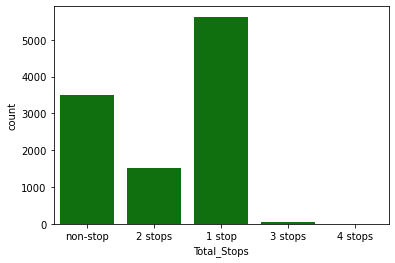

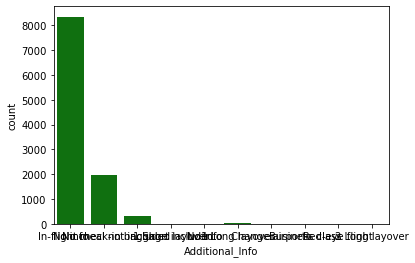

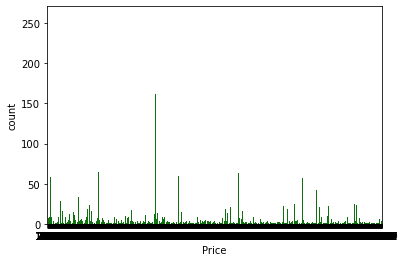

In [11]:
for i in df_train.columns:
    plt.figure()
    sns.countplot(df_train[i],color='green')

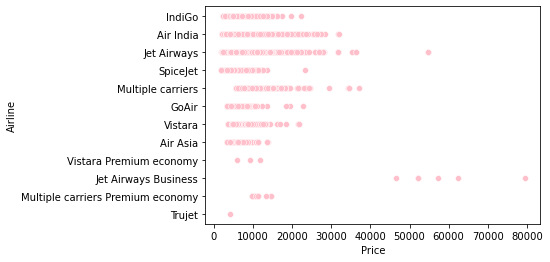

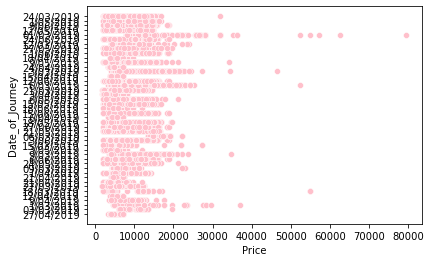

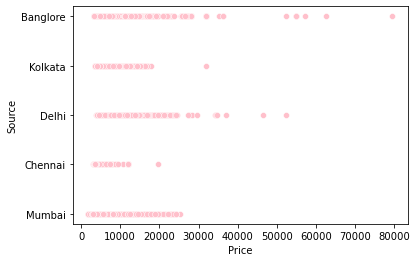

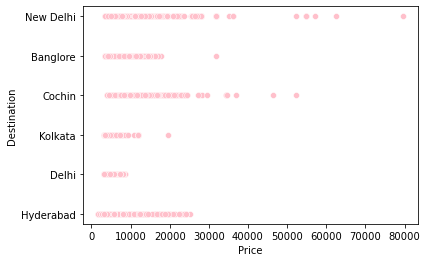

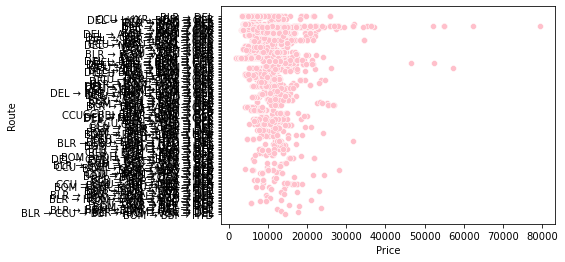

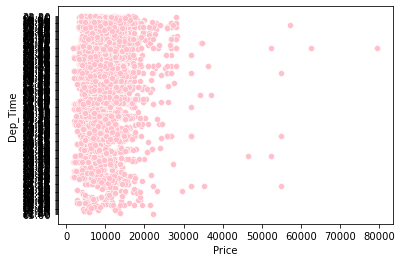

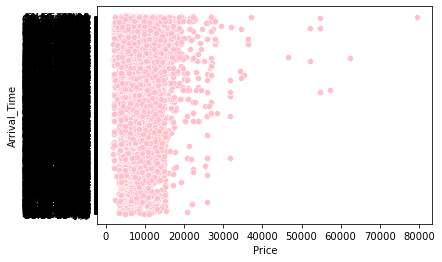

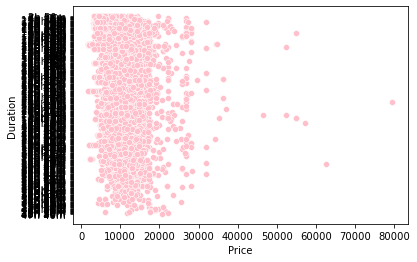

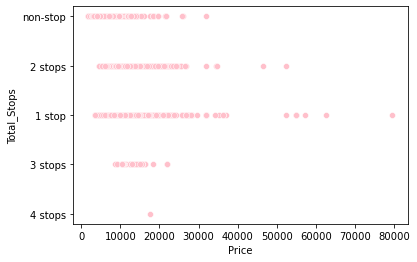

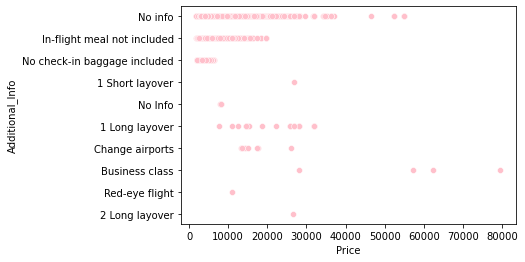

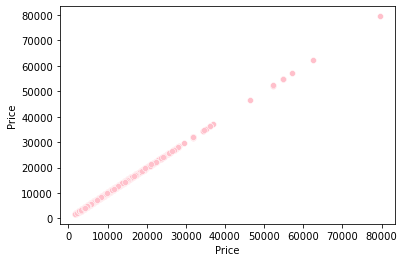

In [12]:
for i in df_train.columns:
    plt.figure()
    sns.scatterplot(x='Price',y=df_train[i],data=df_train,color='pink')

In [13]:
# converting Date_of_Journey to datetime
df_train['Day_journey'] = pd.to_datetime(df_train.Date_of_Journey,format = "%d/%m/%Y").dt.day
df_train['Month_journey'] = pd.to_datetime(df_train.Date_of_Journey,format ="%d/%m/%Y").dt.month

In [14]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_journey,Month_journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
df_train['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [16]:
# since we have converted date_of_journey column into interger, now we can drop the Data_of_Journey

df_train.drop(['Date_of_Journey'],axis = 1,inplace = True)

In [17]:
# Dep_time is also in string format it should coverted into interger 

df_train["dep_hours"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

df_train["dep_mins"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

# After coverting Dep_Time to integer we should the string type column

df_train.drop(["Dep_Time"],axis = 1, inplace = True)

In [18]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_journey,Month_journey,dep_hours,dep_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
# Arrival_Time is also a string values so need to covert it into integer type for model learning 

df_train["Arrival_hour"] = pd.to_datetime(df_train["Arrival_Time"]).dt.hour

df_train["Arrival_mins"]  = pd.to_datetime(df_train["Arrival_Time"]).dt.minute

# After converting data from string to interger Arrival_Time with string data should be dropped

df_train.drop(["Arrival_Time"],axis = 1,inplace = True)

In [20]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_journey,Month_journey,dep_hours,dep_mins,Arrival_hour,Arrival_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
# Duration also has the object data type do need to take care like above columns by converting it into a integer


duration = list(df_train["Duration"])

for i in range(len(duration)):
    
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]   
            
            

duration_hours = []
duration_mins = []


for i in range(len(duration)):
    
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [22]:
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [23]:
df_train.drop(["Duration"],axis = 1,inplace = True)

In [24]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_journey,Month_journey,dep_hours,dep_mins,Arrival_hour,Arrival_mins,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [26]:
# As Airline as Nominal Categorical data we will perform OneHotEncoding


Airline = df_train[["Airline"]]

Airline = pd.get_dummies(Airline,drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
df_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [28]:
Source = df_train[["Source"]]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [29]:
df_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [30]:
Destination = df_train[["Destination"]]

Destination = pd.get_dummies(Destination,drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [31]:
df_train["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [32]:
df_train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [33]:
# Additional_Info contians 8344 has No info which close to 80% of the column 
# And Route and Total_Stops are related to each other

df_train.drop(["Route","Additional_Info"], axis = 1,inplace = True)

In [34]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
# In the above column of Total_Stops  has Ordinal Categoreical data we perform LabelEcoding

df_train.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace = True)

In [36]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day_journey,Month_journey,dep_hours,dep_mins,Arrival_hour,Arrival_mins,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [37]:
# Concatenate DataFrame with OneHotEncoding vaules

train_df = pd.concat([df_train,Airline,Source,Destination],axis = 1)

In [38]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Day_journey,Month_journey,dep_hours,dep_mins,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [39]:
train_df.drop(["Airline","Source","Destination"],axis = 1,inplace = True)

In [40]:
train_df.head()

,Total_Stops,Price,Day_journey,Month_journey,dep_hours,dep_mins,Arrival_hour,Arrival_mins,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [41]:
train_df.shape

(10682, 30)

In [42]:
corr = train_df.corr()
corr

,Total_Stops,Price,Day_journey,Month_journey,dep_hours,dep_mins,Arrival_hour,Arrival_mins,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Day_journey,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Month_journey,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
dep_hours,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
dep_mins,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_mins,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,...,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


In [43]:
train_df.describe()

,Total_Stops,Price,Day_journey,Month_journey,dep_hours,dep_mins,Arrival_hour,Arrival_mins,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,...,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,...,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([<AxesSubplot:title={'center':'Total_Stops'}>,
       <AxesSubplot:title={'center':'Price'}>,
       <AxesSubplot:title={'center':'Day_journey'}>,
       <AxesSubplot:title={'center':'Month_journey'}>,
       <AxesSubplot:title={'center':'dep_hours'}>,
       <AxesSubplot:title={'center':'dep_mins'}>,
       <AxesSubplot:title={'center':'Arrival_hour'}>,
       <AxesSubplot:title={'center':'Arrival_mins'}>,
       <AxesSubplot:title={'center':'Duration_hours'}>,
       <AxesSubplot:title={'center':'Duration_mins'}>,
       <AxesSubplot:title={'center':'Airline_Air India'}>,
       <AxesSubplot:title={'center':'Airline_GoAir'}>,
       <AxesSubplot:title={'center':'Airline_IndiGo'}>,
       <AxesSubplot:title={'center':'Airline_Jet Airways'}>,
       <AxesSubplot:title={'center':'Airline_Jet Airways Business'}>,
       <AxesSubplot:title={'center':'Airline_Multiple carriers'}>,
       <AxesSubplot:title={'center':'Airline_Multiple carriers Premium economy'}>,
       <AxesSubplot:t

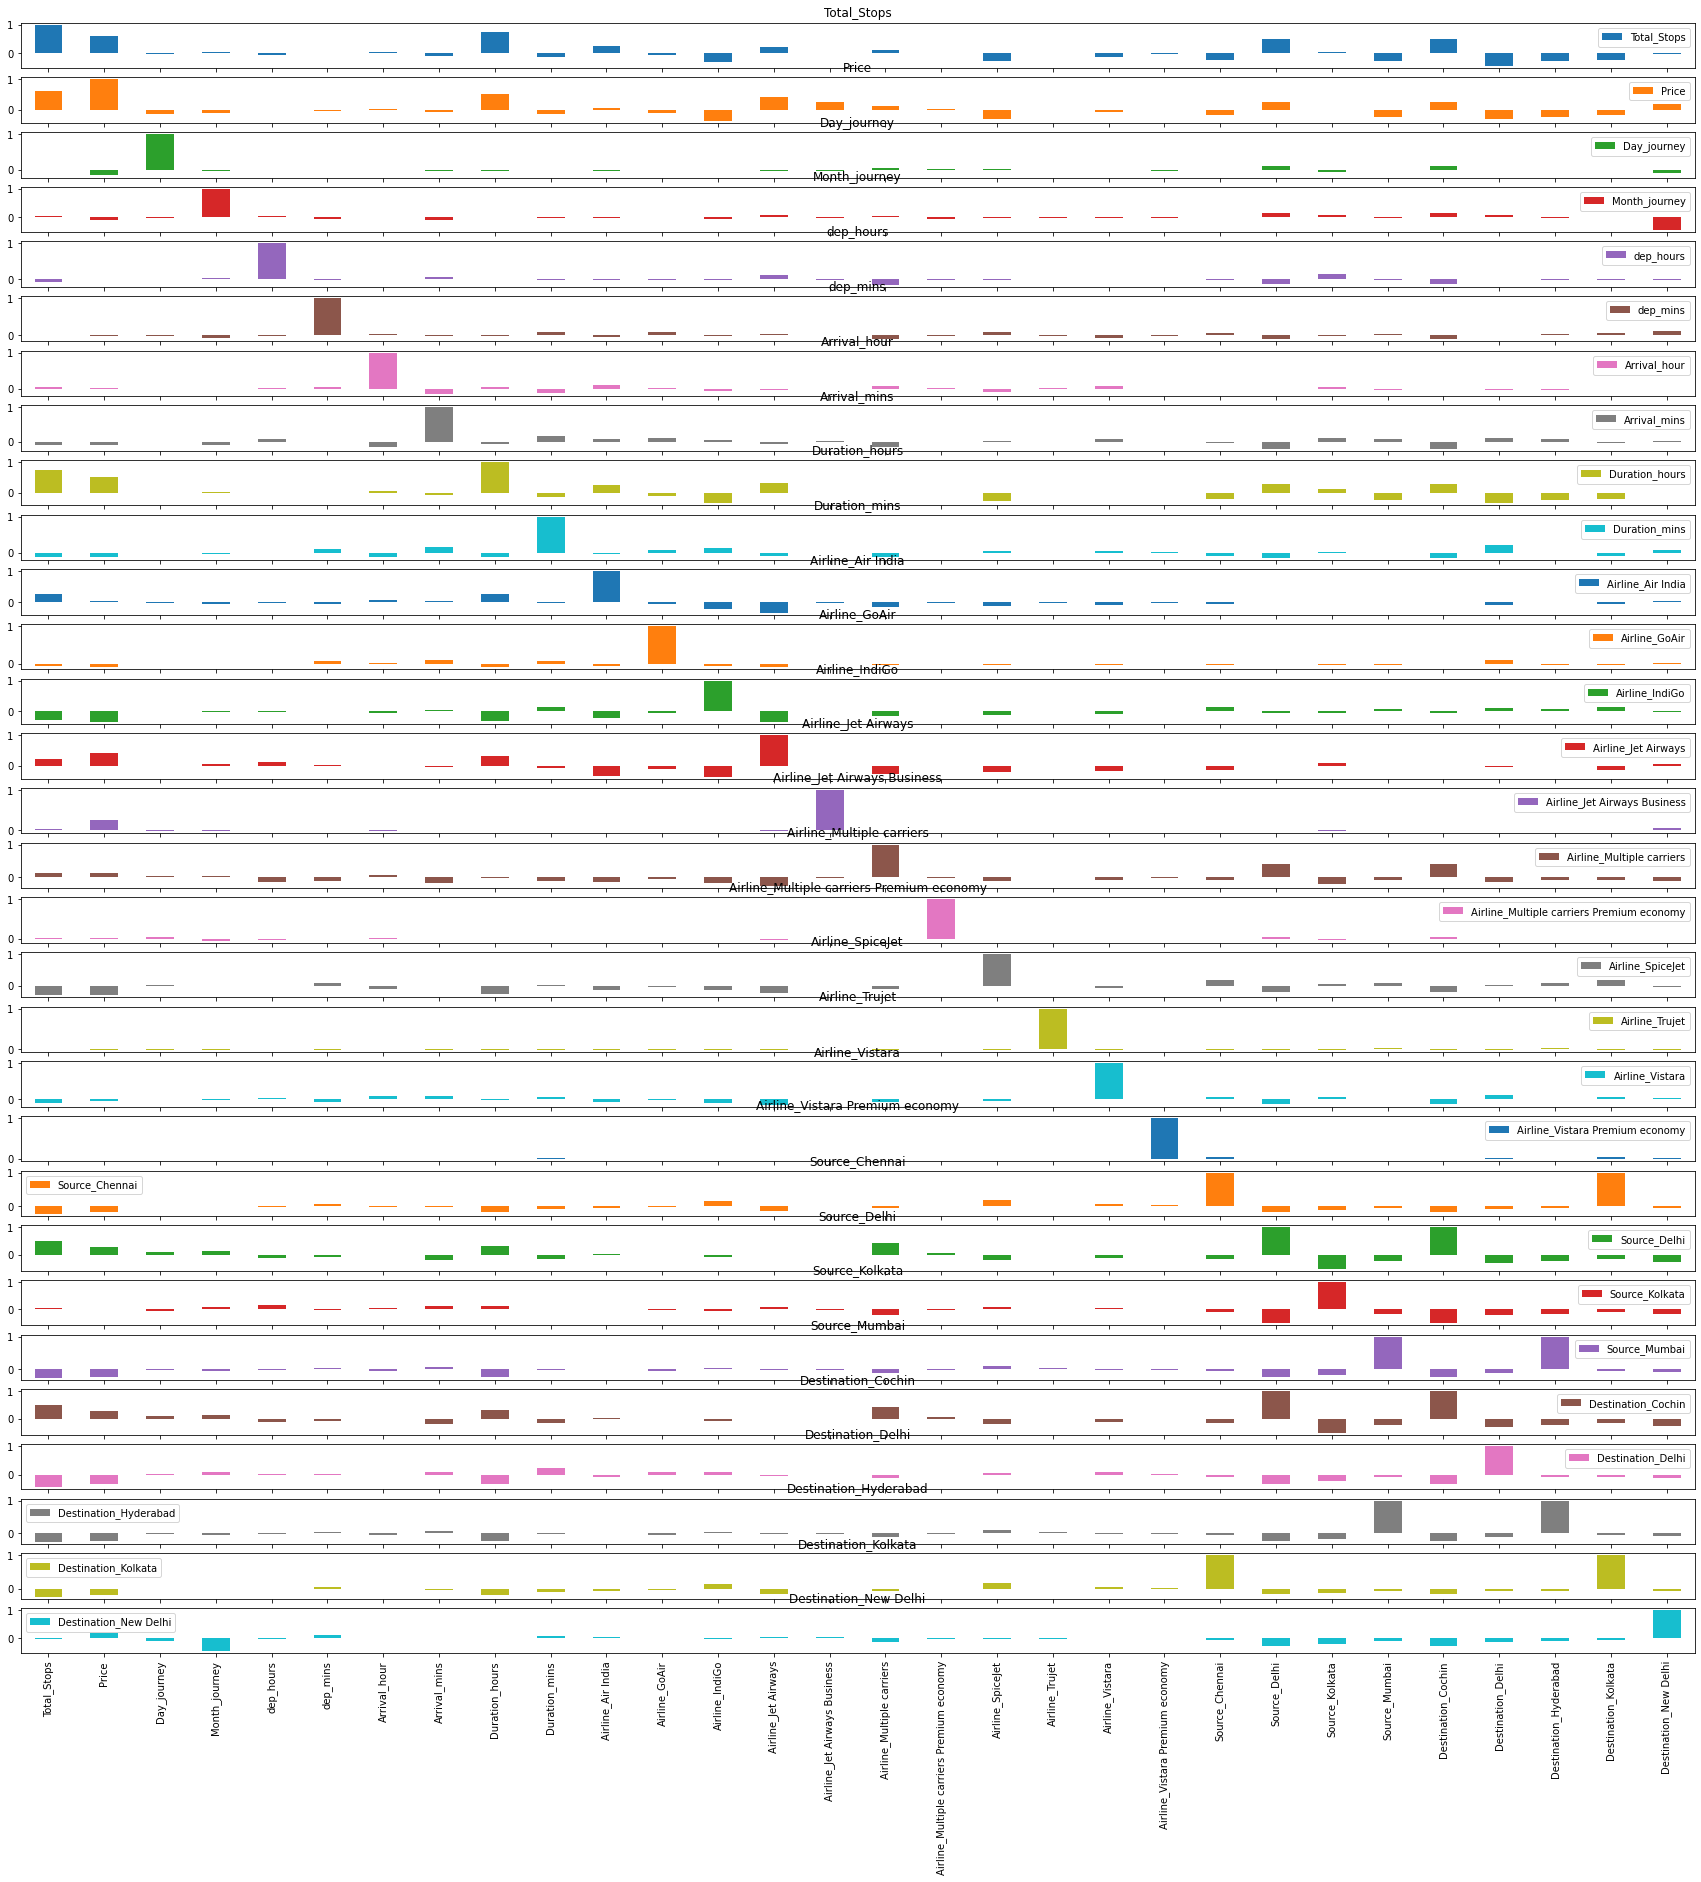

In [44]:
corr.plot(kind = "bar",subplots = True,figsize = (30,30))

<AxesSubplot:>

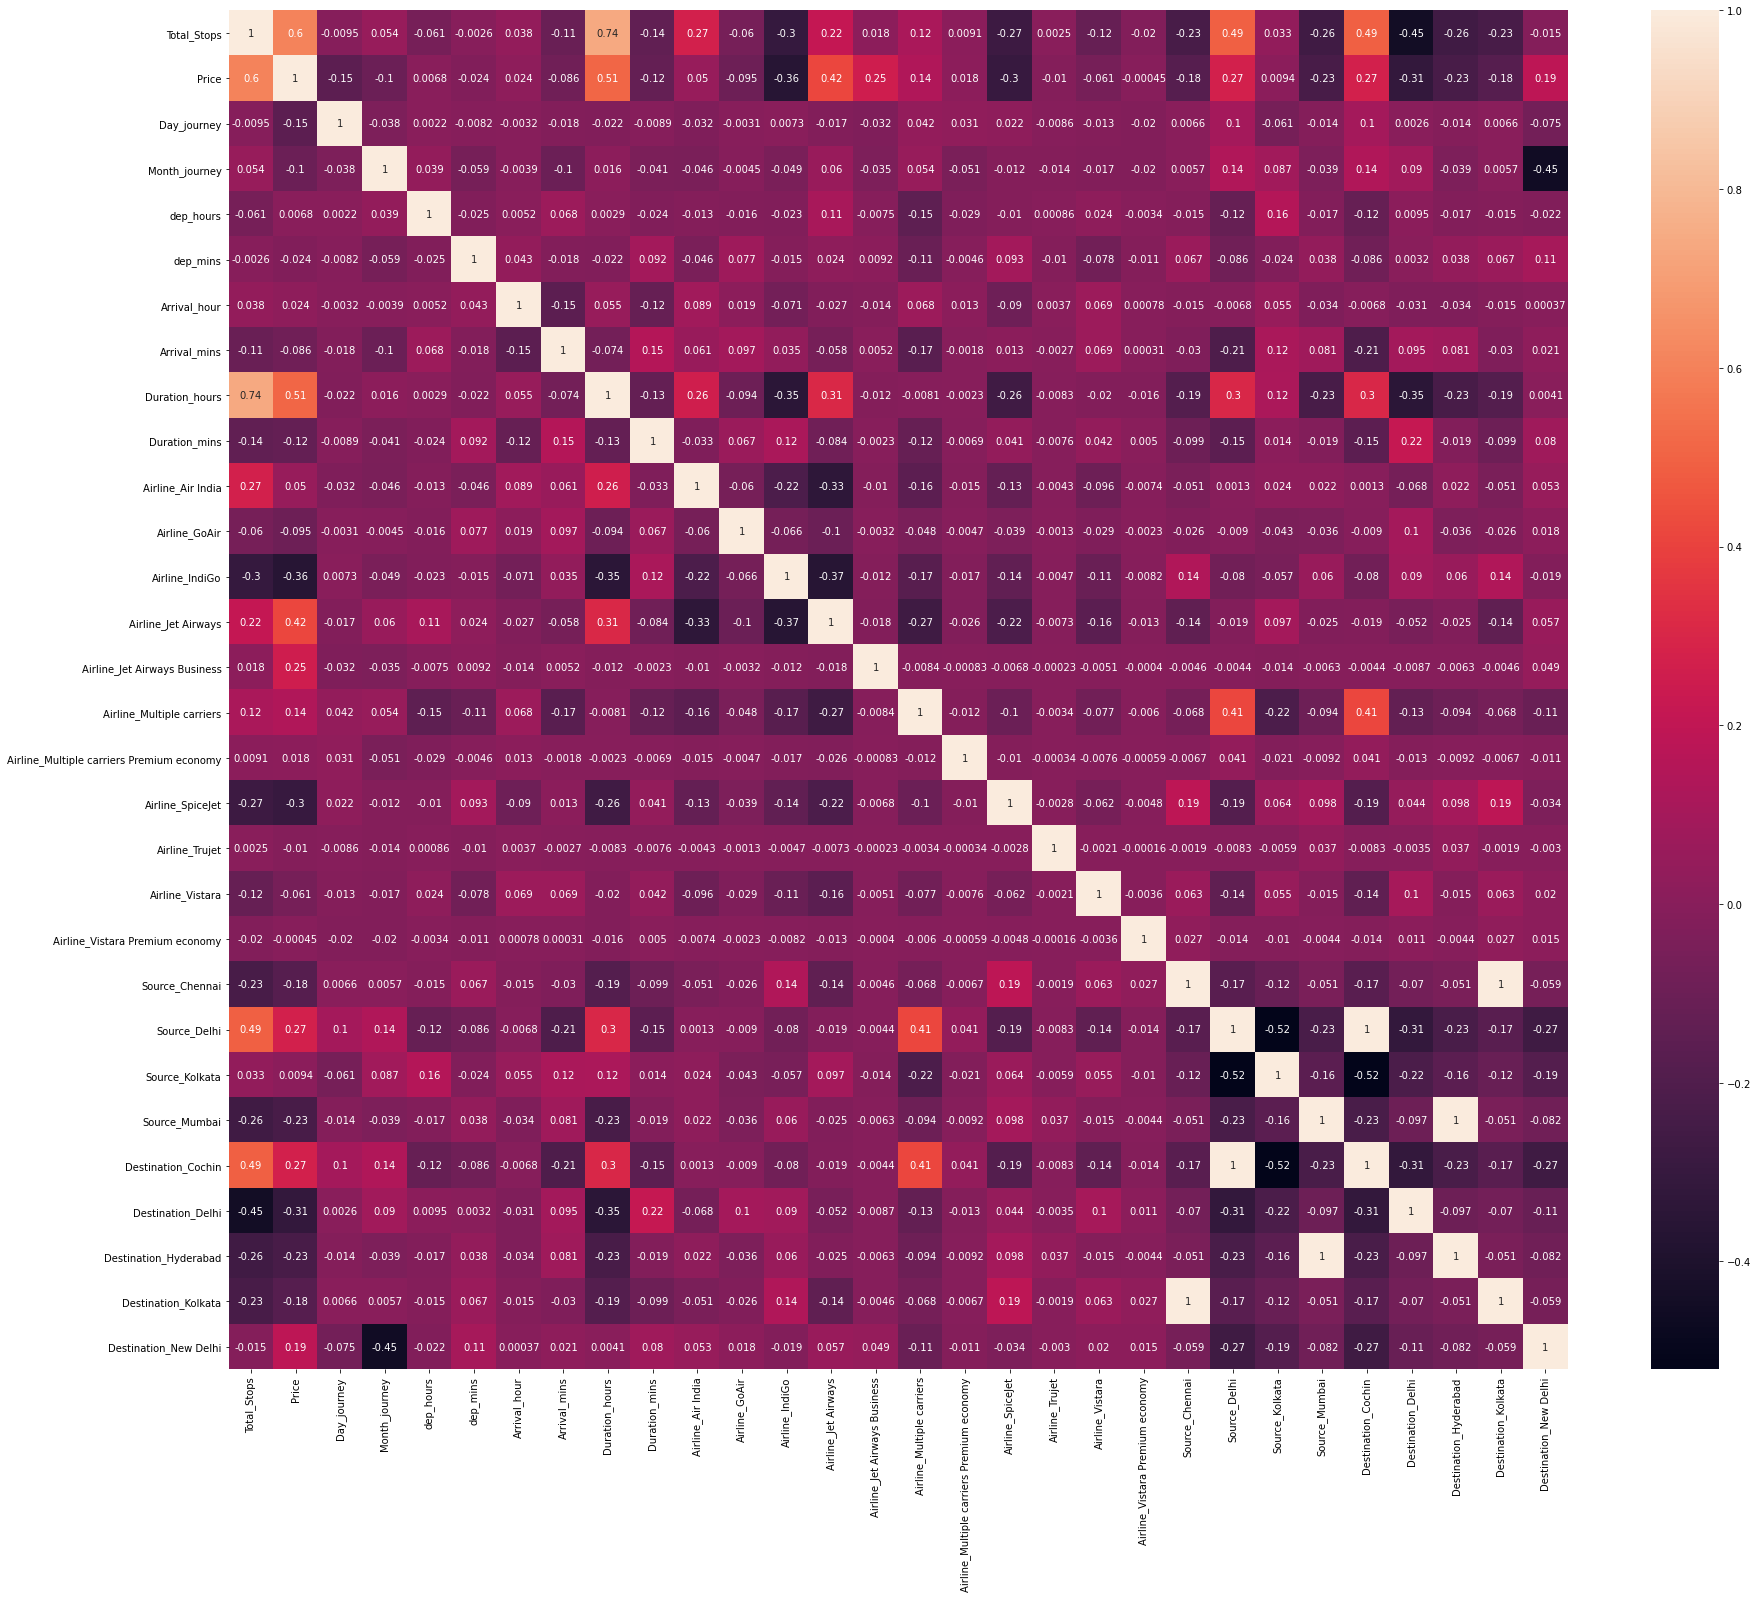

In [45]:
corr_map = train_df.corr()
plt.figure(figsize = (30,25))
sns.heatmap(corr_map,annot = True)


Columns which are negatively correlated with Target columns Price. Positively correlated column is Duration_hours,Airlin Jet Airways and rest are negatively correlated

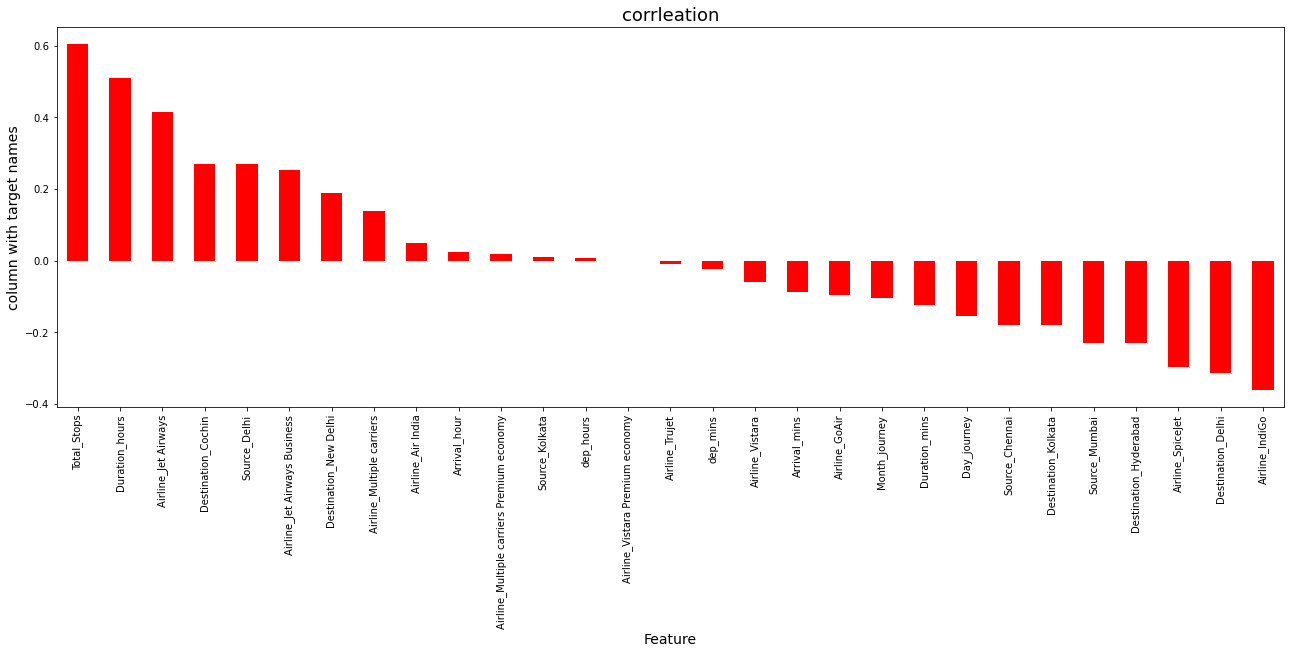

In [46]:
plt.figure(figsize = (22,7))
train_df.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind = 'bar',color = 'r')
plt.xlabel('Feature',fontsize = 14)
plt.ylabel("column with target names", fontsize  = 14)
plt.title("corrleation",fontsize =18)
plt.show()

In [47]:
train_df.columns

Index(['Total_Stops', 'Price', 'Day_journey', 'Month_journey', 'dep_hours',
       'dep_mins', 'Arrival_hour', 'Arrival_mins', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

### Plotting the Outliers

In [48]:
train_df.skew()

Total_Stops                                    0.317109
Price                                          1.812405
Day_journey                                    0.118174
Month_journey                                 -0.387409
dep_hours                                      0.112924
dep_mins                                       0.167234
Arrival_hour                                  -0.370146
Arrival_mins                                   0.110945
Duration_hours                                 0.851197
Duration_mins                                 -0.090680
Airline_Air India                              1.815902
Airline_GoAir                                  7.217685
Airline_IndiGo                                 1.562601
Airline_Jet Airways                            0.581943
Airline_Jet Airways Business                  42.164359
Airline_Multiple carriers                      2.461548
Airline_Multiple carriers Premium economy     28.616840
Airline_SpiceJet                               3

Four columns Airline_Jet Airways Business,Airline_Multiple carriers Premium economy ,Airline_Trujet,Airline_Vistara Premium economy having high skewness in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba56c17940>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba56c1a040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba56c175e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba56c1a700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba56c1aa60>],
 'means': []}

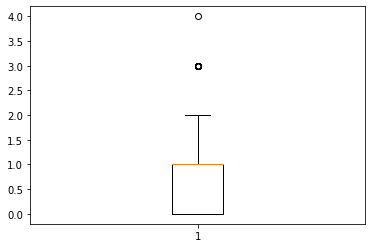

In [49]:
plt.boxplot(train_df["Total_Stops"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba5924a400>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba5924aac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba5924a0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba5923e1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba5923e520>],
 'means': []}

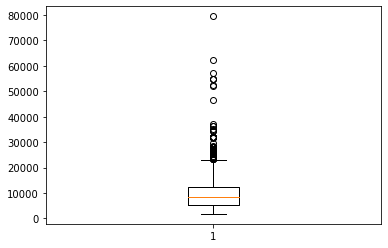

In [50]:
plt.boxplot(train_df["Price"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba59d6eee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba59a9a5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba59d6eb80>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba59a9aca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba59ac1040>],
 'means': []}

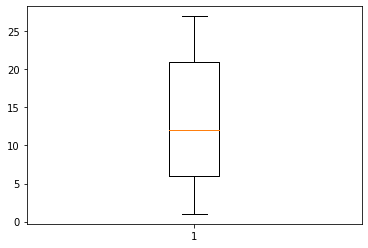

In [51]:
plt.boxplot(train_df["Day_journey"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba56e34bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba56e1f2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba56e34850>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba56e1f970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba56e1fcd0>],
 'means': []}

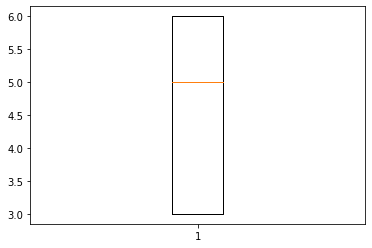

In [52]:
plt.boxplot(train_df["Month_journey"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba58bfad60>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba58c06460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba58bfaa00>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba58c06b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba58c06e80>],
 'means': []}

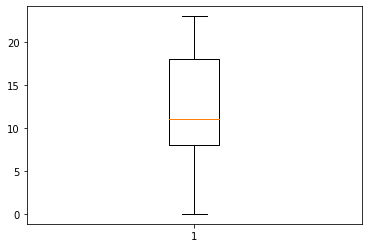

In [53]:
plt.boxplot(train_df["dep_hours"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba54bf95e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba54bf9ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba54bf9280>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba54c15490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba54c153d0>],
 'means': []}

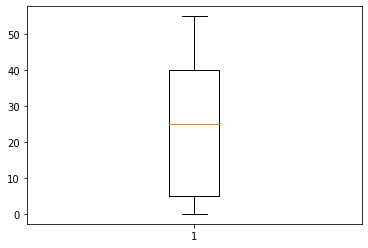

In [54]:
plt.boxplot(train_df["dep_mins"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba57517280>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba57517940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba57506f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba57525040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba575253a0>],
 'means': []}

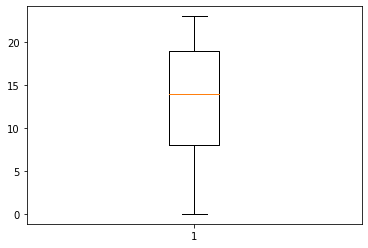

In [55]:
plt.boxplot(train_df["Arrival_hour"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba58c1aa60>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba58c2f100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba58c1a700>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba58c2fc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba58c2fcd0>],
 'means': []}

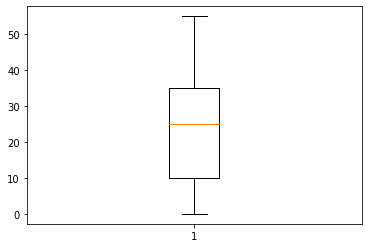

In [56]:
plt.boxplot(train_df["Arrival_mins"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba54777790>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba54777e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba54777430>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba547a3550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba547a38b0>],
 'means': []}

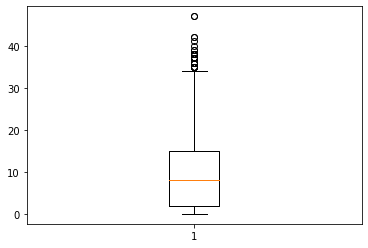

In [57]:
plt.boxplot(train_df["Duration_hours"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba56d60f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba56d52610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba56d60bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba56d52cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba5457f070>],
 'means': []}

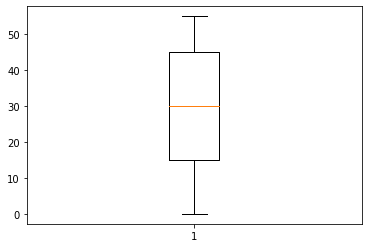

In [58]:
plt.boxplot(train_df["Duration_mins"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba5481bc40>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba54807340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba5481b8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba548079a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba54807d00>],
 'means': []}

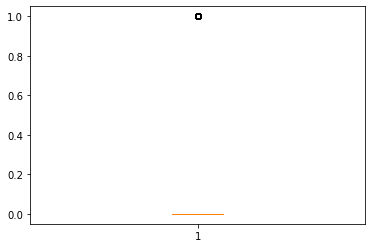

In [59]:
plt.boxplot(train_df["Airline_Air India"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba58af8940>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba58b09040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba58af85e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba58b09700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba58b09a60>],
 'means': []}

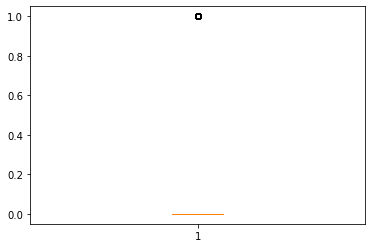

In [60]:
plt.boxplot(train_df["Airline_GoAir"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba5cef55b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba5cef5c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba5cef5250>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba5cf0e370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba5cf0e6d0>],
 'means': []}

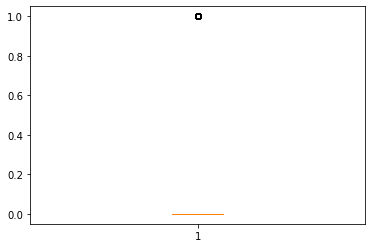

In [61]:
plt.boxplot(train_df["Airline_IndiGo"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba56c572b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba56c57970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba56c46f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba56b5a070>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba56b5a3d0>],
 'means': []}

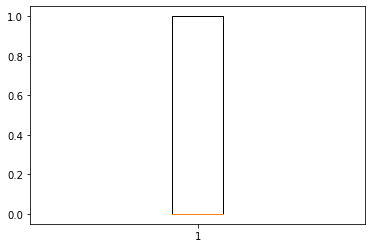

In [62]:
plt.boxplot(train_df["Airline_Jet Airways"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba59f18f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba59f46730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba59f18c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba59f461f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba59f2a0a0>],
 'means': []}

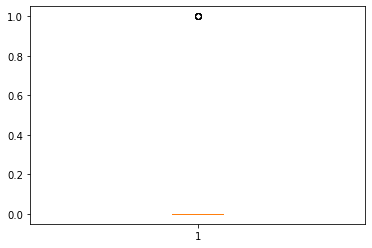

In [63]:
plt.boxplot(train_df["Airline_Jet Airways Business"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba59196c40>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba591af340>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba59196940>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba591afa00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba591afd60>],
 'means': []}

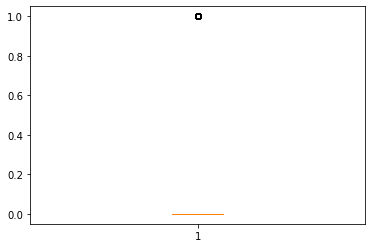

In [64]:
plt.boxplot(train_df["Airline_Multiple carriers"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba59a50970>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba59a7c070>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba59a50670>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba59a7c730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba59a7ca90>],
 'means': []}

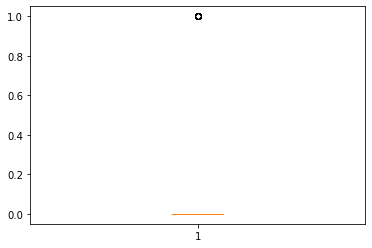

In [65]:
plt.boxplot(train_df["Airline_Multiple carriers Premium economy"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba5d5fe670>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba5d5fecd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba5d5fe310>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba5d8f33d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba5d8f3730>],
 'means': []}

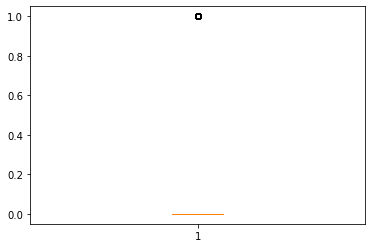

In [66]:
plt.boxplot(train_df["Airline_SpiceJet"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba5d5bd820>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba5d5bd4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba5d5b4f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba5d5cd0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba5d5cd430>],
 'means': []}

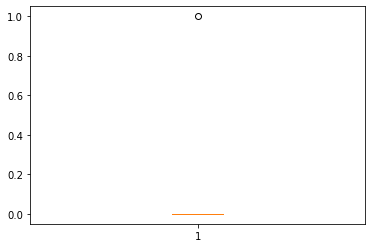

In [67]:
plt.boxplot(train_df["Airline_Trujet"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba58b1cb50>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba546d76d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba544615b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba5526f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba54a967f0>],
 'means': []}

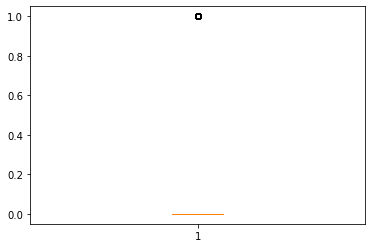

In [68]:
plt.boxplot(train_df["Airline_Vistara"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba56ce02b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba54b104c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba5d711100>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba54b10d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba54b108e0>],
 'means': []}

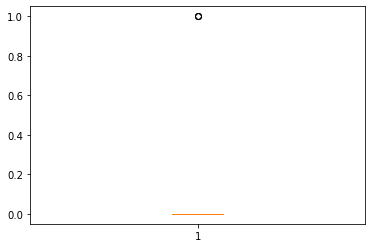

In [69]:
plt.boxplot(train_df["Airline_Vistara Premium economy"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba54cc9430>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba54cc9b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba54b1eee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba54cc9ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba5be44f40>],
 'means': []}

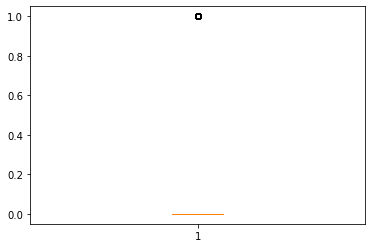

In [70]:
plt.boxplot(train_df["Source_Chennai"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba5cf33190>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba5d413b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba59667d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba5885ee80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba5cf464c0>],
 'means': []}

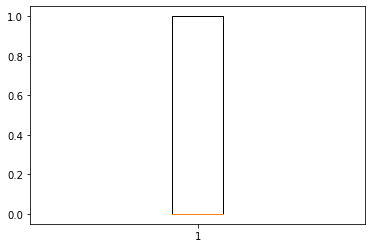

In [71]:
plt.boxplot(train_df["Source_Delhi"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba546593d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba54659a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba54659070>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba5465a190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba5465a4f0>],
 'means': []}

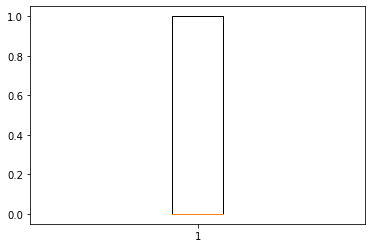

In [72]:
plt.boxplot(train_df["Source_Kolkata"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba54a14a00>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba54a0d100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba54a146a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba54a0d7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba54a0db20>],
 'means': []}

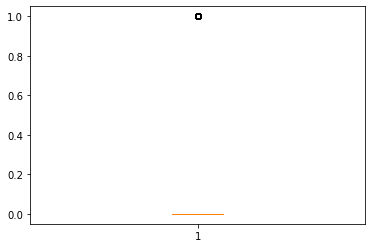

In [73]:
plt.boxplot(train_df["Source_Mumbai"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba575cb040>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba575cb700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba575dcca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba575cbdc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba575d6160>],
 'means': []}

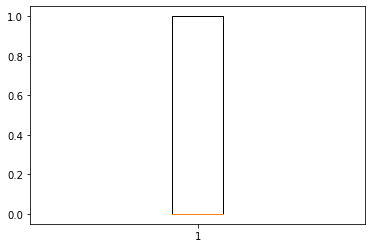

In [74]:
plt.boxplot(train_df["Destination_Cochin"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba58b74640>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba58b74d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba58b742e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba58960400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba58960760>],
 'means': []}

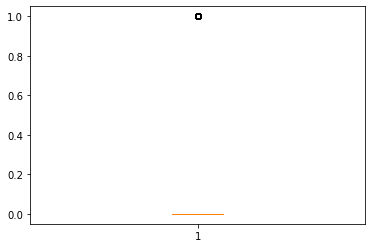

In [75]:
plt.boxplot(train_df["Destination_Delhi"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba558a3ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba5587d3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba558a3940>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba5587da60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba5587ddc0>],
 'means': []}

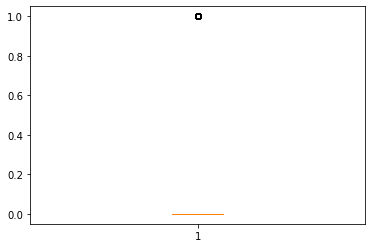

In [76]:
plt.boxplot(train_df["Destination_Hyderabad"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba556be460>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba556be820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba556b6f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba58f9d0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba58f9d400>],
 'means': []}

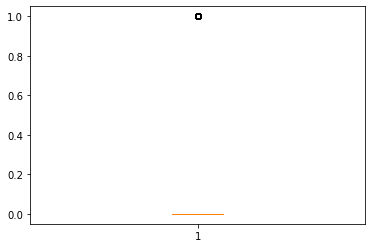

In [77]:
plt.boxplot(train_df["Destination_Kolkata"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba591d88e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba591d8fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba591d8580>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba591f5dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba591f5310>],
 'means': []}

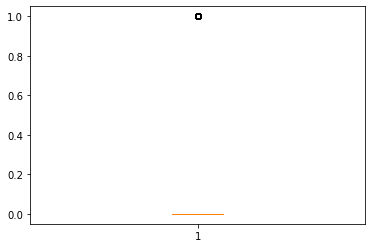

In [78]:
plt.boxplot(train_df["Destination_New Delhi"])

Their are few outliers in some columns few column don't have any outliers

### Test Dataset

In [79]:
df_test = pd.read_excel(r"Test_set.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [80]:
print("Test data info :")
print("-"*75)
print(df_test.info())

print()
print()

Test data info :
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None




In [81]:
print("Null values :")
print("-"*75)
df_test.dropna(inplace = True)
print(df_test.isnull().sum())

Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [82]:
df_test["Day_journey"] = pd.to_datetime(df_test.Date_of_Journey,format = "%d/%m/%Y").dt.day
df_test["Month_journey"] = pd.to_datetime(df_test.Date_of_Journey,format = "%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [83]:
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_journey,Month_journey
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [84]:
df_test["Dep_hours"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_mins"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"],axis = 1, inplace = True)


In [85]:
df_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_journey,Month_journey,Dep_hours,Dep_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [86]:
df_test["Arrival_hour"] = pd.to_datetime(df_test["Arrival_Time"]).dt.hour
df_test["Arrival_mins"] = pd.to_datetime(df_test["Arrival_Time"]).dt.minute
df_test.drop(["Arrival_Time"],axis = 1,inplace = True)
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_journey,Month_journey,Dep_hours,Dep_mins,Arrival_hour,Arrival_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [87]:

duration = list(df_test["Duration"])

for i in range(len(duration)):
    
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]   
            
            

duration_hours = []
duration_mins = []


for i in range(len(duration)):
    
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
    
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins
df_test.drop(["Duration"],axis = 1 ,inplace = True)


In [88]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_journey,Month_journey,Dep_hours,Dep_mins,Arrival_hour,Arrival_mins,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [89]:
print("Airline")
print("-"*75)
print(df_test["Airline"].value_counts())
Airline = pd.get_dummies(df_test["Airline"], drop_first= True)

print()

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64



In [90]:
print("Destination")
print("-"*75)
print(df_test["Destination"].value_counts())
Destination = pd.get_dummies(df_test["Destination"], drop_first = True)

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [91]:
print("Source")
print("-"*75)
print(df_test["Source"].value_counts())
Source = pd.get_dummies(df_test["Source"], drop_first= True)


Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [92]:
# Additional_Info contians 8344 has No info which close to 80% of the column 
# And Route and Total_Stops are related to each other

df_test.drop(["Route","Additional_Info"], axis = 1,inplace = True)

In [93]:
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_test

,Airline,Source,Destination,Total_Stops,Day_journey,Month_journey,Dep_hours,Dep_mins,Arrival_hour,Arrival_mins,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,0,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1,6,3,4,0,19,15,15,15


In [94]:
test_df = pd.concat([df_test, Airline, Source, Destination], axis = 1)

test_df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [95]:
test_df.head()

,Total_Stops,Day_journey,Month_journey,Dep_hours,Dep_mins,Arrival_hour,Arrival_mins,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [96]:
test_df.shape

(2671, 28)

###  plotting the train data Outliers

Total_Stops                                     AxesSubplot(0.125,0.749828;0.110714x0.130172)
Price                                        AxesSubplot(0.257857,0.749828;0.110714x0.130172)
Day_journey                                  AxesSubplot(0.390714,0.749828;0.110714x0.130172)
Month_journey                                AxesSubplot(0.523571,0.749828;0.110714x0.130172)
dep_hours                                    AxesSubplot(0.656429,0.749828;0.110714x0.130172)
dep_mins                                     AxesSubplot(0.789286,0.749828;0.110714x0.130172)
Arrival_hour                                    AxesSubplot(0.125,0.593621;0.110714x0.130172)
Arrival_mins                                 AxesSubplot(0.257857,0.593621;0.110714x0.130172)
Duration_hours                               AxesSubplot(0.390714,0.593621;0.110714x0.130172)
Duration_mins                                AxesSubplot(0.523571,0.593621;0.110714x0.130172)
Airline_Air India                            AxesSubplot(0.6

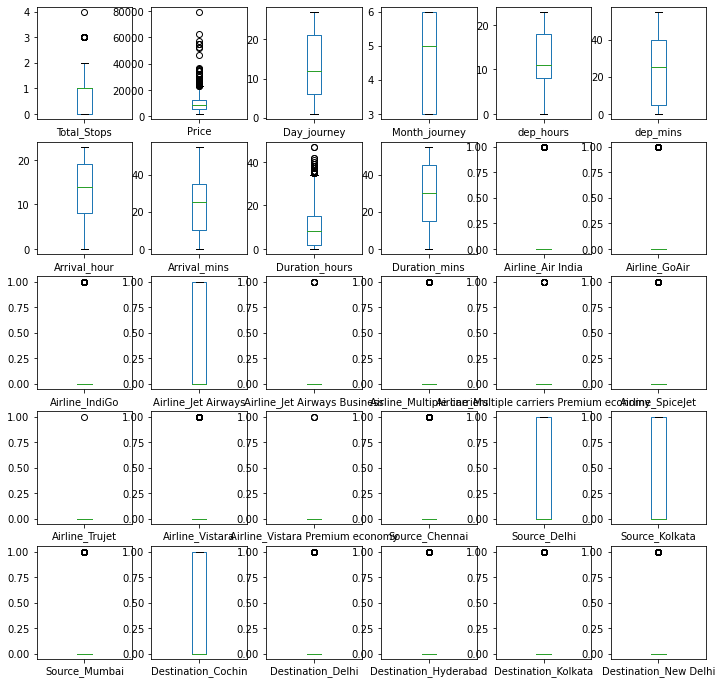

In [97]:
train_df.plot(kind = 'box',figsize = (12,12),layout = (5,6),sharex = False, subplots = True)

In [98]:
train_df.shape

(10682, 30)

In [99]:
from scipy.stats import zscore
z = np.abs(zscore(train_df))
z


thersold = 3
print(np.where(z>3))

(array([    0,     4,     5, ..., 10676, 10680, 10680], dtype=int64), array([29, 29, 17, ..., 17, 19, 29], dtype=int64))


In [100]:
df_new = train_df[(z<3).all(axis = 1)]
print(train_df.shape)
print(df_new.shape)

(10682, 30)
(7506, 30)


### Percentage of loss

In [101]:
loss = (10682-7506)/10682*100
loss

29.732259876427637

percentag of the loss is greater than 10 percent we have to continue with outliers

In [102]:
x = train_df.drop(["Price"],axis = 1)
y = train_df["Price"]


In [103]:
x.shape

(10682, 29)

In [104]:
y.shape

(10682,)

In [105]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.29781964,  1.16429632, -1.40174783, ..., -0.2642058 ,
        -0.19231927,  3.23440464],
       [ 1.57461744, -1.71642404,  0.16141773, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       [ 1.57461744, -0.405463  ,  1.17509575, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       ...,
       [-1.29781964,  1.42669838, -0.69761654, ..., -0.2642058 ,
        -0.19231927, -0.30917591],
       [-1.29781964, -1.71642404, -1.40174783, ..., -0.2642058 ,
        -0.19231927,  3.23440464],
       [ 1.57461744, -0.405463  ,  0.16141773, ..., -0.2642058 ,
        -0.19231927, -0.30917591]])

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
lr = LinearRegression()

In [108]:
for i in range(0,15000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At Random score",i,"Model Performance is very well")
        print("Random stata is:",i)
        print("Train Score",r2_score(y_train,pred_train)*100)
        print("Test Score",r2_score(y_test,pred_test)*100)

At Random score 2648 Model Performance is very well
Random stata is: 2648
Train Score 62.584455543639564
Test Score 62.58201101199165
At Random score 3352 Model Performance is very well
Random stata is: 3352
Train Score 62.58294041358001
Test Score 62.584666229603904
At Random score 3591 Model Performance is very well
Random stata is: 3591
Train Score 62.55782448764155
Test Score 62.56398895573039
At Random score 3931 Model Performance is very well
Random stata is: 3931
Train Score 62.60087904735694
Test Score 62.599041273238875
At Random score 5497 Model Performance is very well
Random stata is: 5497
Train Score 62.59291777020902
Test Score 62.586670035499466
At Random score 6151 Model Performance is very well
Random stata is: 6151
Train Score 62.60017282749077
Test Score 62.599167742791806
At Random score 8400 Model Performance is very well
Random stata is: 8400
Train Score 62.60486262824223
Test Score 62.60490820793295
At Random score 10759 Model Performance is very well
Random stat

In [109]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [110]:
svr=SVR()
svrl=SVR(kernel='linear')
svrp=SVR(kernel='poly')
dtc=DecisionTreeRegressor()
knn=KNeighborsRegressor()

In [111]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Training Score:-',f.score(x_train,y_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred))
    print('Mean Squared Error',mean_squared_error(y_test,pred))
    print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

In [112]:
fun(lr)

Training Score:- 63.93014388646077
Mean Absolute Error 1998.5332168693226
Mean Squared Error 10140809.037371442
Root Mean Squared Erro 3184.4636969781022
R2 Score 57.97279535638504


In [113]:
fun(svr)

Training Score:- 6.660580022715634
Mean Absolute Error 3442.923683239978
Mean Squared Error 22634380.94227587
Root Mean Squared Erro 4757.560398174244
R2 Score 6.19488481274677


In [114]:
fun(svrl)

Training Score:- 54.19194930162672
Mean Absolute Error 2026.1310991569744
Mean Squared Error 12354544.061960198
Root Mean Squared Erro 3514.9031369242875
R2 Score 48.798271453778796


In [115]:
fun(dtc)

Training Score:- 96.83668967665466
Mean Absolute Error 1365.9392918421463
Mean Squared Error 7069953.24249779
Root Mean Squared Erro 2658.938367562849
R2 Score 70.69953978541126


In [116]:
fun(knn)

Training Score:- 85.59424432665058
Mean Absolute Error 1447.278053345812
Mean Squared Error 6988585.259447823
Root Mean Squared Erro 2643.5932477307897
R2 Score 71.0367583310398


In [117]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [118]:
rfr=RandomForestRegressor()
adr=AdaBoostRegressor()
gfr=GradientBoostingRegressor()

In [119]:
fun(rfr)

Training Score:- 95.51341988974616
Mean Absolute Error 1187.6670027216583
Mean Squared Error 5487856.196558426
Root Mean Squared Erro 2342.617381596582
R2 Score 77.25632594228651


In [120]:
fun(adr)

Training Score:- 56.411002146983826
Mean Absolute Error 2408.272447793191
Mean Squared Error 11822460.27932462
Root Mean Squared Erro 3438.380473322378
R2 Score 51.00342036625359


In [121]:
fun(gfr)

Training Score:- 79.911909967502
Mean Absolute Error 1574.6341702701131
Mean Squared Error 6649190.652917882
Root Mean Squared Erro 2578.602461202169
R2 Score 72.44333314484483


In [122]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [123]:
y_pred = rfr.predict(x_test)

In [124]:
rfr.score(x_train,y_train)

0.9548749983897983

In [125]:
rfr.score(x_test,y_test)

0.7700540761711225

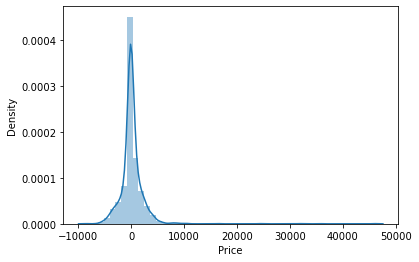

In [126]:
sns.distplot(y_test-y_pred)
plt.show()

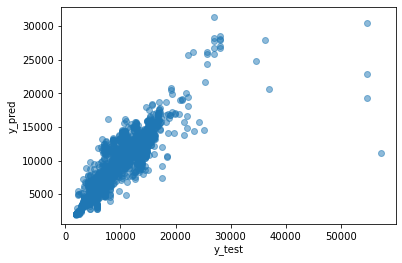

In [127]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


### Regularization

In [128]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [129]:
ls = Lasso()
ri = Ridge()
en = ElasticNet()

In [130]:
fun(ls)

Training Score:- 63.92974501253488
Mean Absolute Error 1998.169016507337
Mean Squared Error 10139913.535611056
Root Mean Squared Erro 3184.3230890742
R2 Score 57.9765066417079


In [131]:
fun(ri)

Training Score:- 63.930197570482285
Mean Absolute Error 1998.63793826977
Mean Squared Error 10140490.116101103
Root Mean Squared Erro 3184.413622019147
R2 Score 57.974117082239886


In [132]:
fun(en)

Training Score:- 60.192088549617154
Mean Absolute Error 2108.3618482226725
Mean Squared Error 11189033.578574196
Root Mean Squared Erro 3345.00128229784
R2 Score 53.62857122759633


### Hyperparameter Tuning

In [133]:
from sklearn.model_selection import RandomizedSearchCV

In [134]:
l1 = {'n_jobs':[1,2,3,4,5],'copy_X':['True','False'],'fit_intercept':['True','False'],'positive':['True','False']}

In [135]:
g1 = GridSearchCV(lr,l1)
g1.fit(x,y)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': [1, 2, 3, 4, 5],
                         'positive': ['True', 'False']})

In [136]:
lr1 = LinearRegression(copy_X = True,fit_intercept = True,n_jobs = 1)

In [137]:
fun(lr1)

Training Score:- 63.93014388646077
Mean Absolute Error 1998.5332168693226
Mean Squared Error 10140809.037371442
Root Mean Squared Erro 3184.4636969781022
R2 Score 57.97279535638504


In [138]:
p2={'alpha':[10,1,0.1,0.001,0.0001,0.00001],'fit_intercept':['True','False'],'copy_X':['True','False']
    ,'max_iter':[10,50,75,100,250,500,1000,3000,5000,10000],
    'selection':['cyclic','random'],'positive':['True','False']}

In [139]:
g2=GridSearchCV(ls,p2)
g2.fit(x,y)
print(g2.best_params_)

{'alpha': 1, 'copy_X': 'False', 'fit_intercept': 'True', 'max_iter': 50, 'positive': 'True', 'selection': 'random'}


In [140]:
ls1 = Lasso(alpha = 0.001,copy_X = False,max_iter = 5,fit_intercept = True)

In [141]:
fun(ls1)

Training Score:- 63.36790765828375
Mean Absolute Error 2016.0420592416372
Mean Squared Error 10211836.75042415
Root Mean Squared Erro 3195.596462387601
R2 Score 57.67843065423619


In [142]:
p3={'alpha':[10,1,0.1,0.01,0.001,0.0001],'fit_intercept':['True','False'],'copy_X':['True','False'],
    'max_iter':[5,10,50,75,100,250,500]}

In [143]:
g3 = GridSearchCV(ri,p3)
g3.fit(x,y)
print(g3.best_params_)

{'alpha': 10, 'copy_X': 'True', 'fit_intercept': 'True', 'max_iter': 5}


In [144]:
ri1 = Ridge(alpha = 0.0001,copy_X = True,max_iter = 5)

In [145]:
fun(ri1)

Training Score:- 63.930205645626735
Mean Absolute Error 1998.6782961841288
Mean Squared Error 10140331.397575408
Root Mean Squared Erro 3184.38870076745
R2 Score 57.97477486959546


In [146]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at

In [151]:
prediction = rfr.predict(x_test)

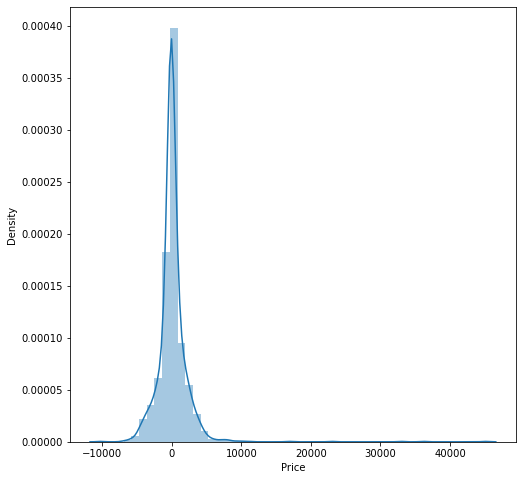

In [152]:
plt.figure(figsize = (8,8))
sns.distplot(y_test - prediction)
plt.show()

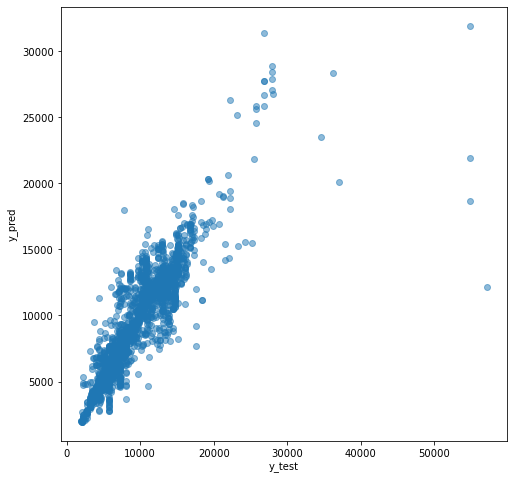

In [153]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [154]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1191.5657268509967
MSE: 5572602.549803155
RMSE: 2360.6360477217054


### Saving the best Model

In [155]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rfr.pkl', 'wb')

# dump information to that file
pickle.dump(rfr, file)

In [156]:
model = open('flight_rfr.pkl','rb')
forest = pickle.load(model)

In [157]:
y_prediction = forest.predict(x_test)

In [158]:
metrics.r2_score(y_test, y_prediction)

0.7690510620059817

### Conclusion

      Actual       Predict
9260   11467  10594.233333
9973    9181   9391.000000
9636   13067  10388.770417
4405    6587   8125.570000
5155    4804   4867.380000
...      ...           ...
5140    4174   4180.280000
3201    6590   9288.370000
4123   11467  11248.795000
7716   10031  13007.067500
7880    3850   3908.420000

[2137 rows x 2 columns]


Text(0.5, 1.0, 'Random Forest Regressor')

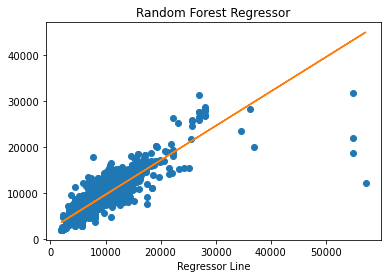

In [159]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rfr.predict(x_test)

print(res)

x=np.array(y_test)
y=np.array(rfr.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Regressor Line')
plt.title('Random Forest Regressor')